In [0]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/pytorch-unet-master


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
if not 'cuda':
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

# Activation (sigmoid) function


In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))   # a=sig(x)=sig(z)=sig(wx+b)
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output) #output predecido

# TODO: Backpropagate the error
 this is given by the equation $$ (y-\hat{y}) \sigma'(x) $$

In [0]:
# TODO: Write the error term formula  dE/dW= dE/da* da/dw= 
def error_term_formula(x, y, output):
    op=sigmoid_prime(x)
    error_term = (y-output)*op
    return error_term

In [0]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))
            # The error, the target minus the network output
            error = error_formula(y, output) #output predecido
            # The error term
            error_term = error_term_formula(x, y, output) # ∂E/∂a2∙ ∂a2/∂z2
            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x
        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

# Nueva sección

In [0]:
# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    prediction=output_formula(x, weights, bias)
    weights= weights+learnrate*(y-prediction)*x
    bias= bias+learnrate*(y-prediction)
    return weights, bias


In [0]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

In [0]:
%load_ext autoreload
%autoreload 2
import torch #import pytorch

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

In [0]:
# Data
torch.manual_seed(7) # Set the random seed so things are predictable
features = torch.randn(1,5)
print(features.size())
weigth =torch.randn_like(features)
print(weigth.size())
bias=torch.randn(1,1)
print(bias.size())


torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])


In [0]:
#Output of the network 
y= activation(torch.sum(features*weigth)+bias)
print(y)

tensor([[0.1595]])


In [0]:
y= activation((torch.mm(features,weigth.view(5,1)))+bias)
print(y)

tensor([[0.1595]])


In [0]:
torch.manual_seed(7)
features= torch.randn(1,3)
n_inputs =features.shape[1]
print(n_inputs)
n_hidden =2
n_output =1

w1= torch.randn(n_inputs,n_hidden)
print(w1.size())

w2= torch.randn(n_hidden,n_output)
print(w2.size())

b1= torch.randn(1, n_hidden)
print(b1.size())

b2= torch.randn(1, n_output)
print(b2.size())

x= activation(torch.mm(features, w1)+b1)
x= activation(torch.mm(x, w2)+b2)
print(x)

3
torch.Size([3, 2])
torch.Size([2, 1])
torch.Size([1, 2])
torch.Size([1, 1])
tensor([[0.3171]])


## Numpy to Torch and back


In [0]:
#Numpy to torch and back
import numpy as np

a= np.random.rand(4,3)
a

array([[0.07109413, 0.80981225, 0.4507774 ],
       [0.661656  , 0.24958261, 0.08846466],
       [0.01120358, 0.73982166, 0.5981185 ],
       [0.77816032, 0.75317976, 0.23976853]])

In [0]:
atorch_a= torch.from_numpy(a)
atorch_a

tensor([[0.0711, 0.8098, 0.4508],
        [0.6617, 0.2496, 0.0885],
        [0.0112, 0.7398, 0.5981],
        [0.7782, 0.7532, 0.2398]], dtype=torch.float64)

In [0]:
anumpy_a = atorch_a.numpy()
anumpy_a

array([[0.07109413, 0.80981225, 0.4507774 ],
       [0.661656  , 0.24958261, 0.08846466],
       [0.01120358, 0.73982166, 0.5981185 ],
       [0.77816032, 0.75317976, 0.23976853]])

In [0]:
atorch_a*2

tensor([[0.1422, 1.6196, 0.9016],
        [1.3233, 0.4992, 0.1769],
        [0.0224, 1.4796, 1.1962],
        [1.5563, 1.5064, 0.4795]], dtype=torch.float64)

In [0]:
atorch_a.mul_(2)

tensor([[0.1422, 1.6196, 0.9016],
        [1.3233, 0.4992, 0.1769],
        [0.0224, 1.4796, 1.1962],
        [1.5563, 1.5064, 0.4795]], dtype=torch.float64)

# Without torch.nn


In [0]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [0]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

In [0]:
print(len(x_train))
print(len(y_valid))

50000
10000


In [0]:
x_train.size #50000*784

39200000

In [0]:
x_train.shape

(50000, 784)

(50000, 784)


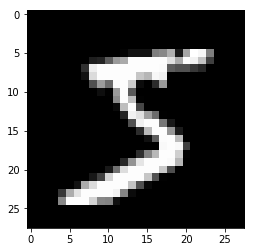

In [0]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [0]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)   #pasar a tensor
n, c = x_train.shape  # saca las filas y colum
#x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape) #torch.Size([50000, 784])
print(y_train.min(), y_train.max()) #tensor(0) tensor(9)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [0]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [0]:
print(bias.shape)
weights.shape

torch.Size([10])


torch.Size([784, 10])

In [0]:
bias

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [0]:
def log_softmax(x):  # x un tensor
    return x - x.exp().sum(-1).log().unsqueeze(-1) #log( exp(x_i) / exp(x).sum() )  
                                    #Returns a new tensor with a dimension of size one inserted at the specified position.
def model(xb):
    return log_softmax(xb @ weights + bias)

In [0]:
bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
preds = model(xb)  # predictions
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.4911, -2.1262, -2.7449, -2.1441, -2.3327, -2.2079, -2.1432, -2.3945,
        -2.4131, -2.1941], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [0]:
np.log(2) #log natural

0.6931471805599453

In [0]:
np.log(np.exp(2))

2.0

In [0]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [0]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3670, grad_fn=<NegBackward>)


In [0]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1) #reducir a una dimension #a que numero se parece mas el de mayor probabilidas
    return (preds == yb).float().mean()
#Returns the indices of the maximum values of a tensor across a dimension.
#input (Tensor) – the input tensor
#dim (int) – the dimension to reduce. If None, the argmax of the flattened input is returned.
#keepdim (bool) – whether the output tensors have dim retained or not. Ignored if dim=None.

In [0]:
a = torch.randn(4, 4) #devuelve en una dimension, el indice donde se tenga un maximo en cada fila 
a

tensor([[-0.1573, -1.0387, -1.0162, -1.6349],
        [-0.3013,  0.9827,  0.2287, -0.6800],
        [ 0.0501, -0.9102, -0.7634,  1.4675],
        [-0.3828,  0.5052,  0.6649,  0.9535]])

In [0]:
torch.argmax(a, dim=1)

tensor([0, 1, 3, 3])

In [0]:
print(accuracy(preds, yb))


tensor(0.0781)


In [0]:
(n - 1) // bs + 1

782

In [0]:
from IPython.core.debugger import set_trace

lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1): #n filas
        #         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

In [0]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))


tensor(0.0803, grad_fn=<NegBackward>) tensor(1.)


##Neural 2

In [0]:
import torch #import pytorch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
# Download and load the training data
trainset= datasets.MNIST('~/.pytorch/MNIST_data/',download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:01, 8694901.66it/s]                             


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 320529.67it/s]                           
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 1850553.42it/s]                             
8192it [00:00, 129467.39it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
dataiter=iter(trainloader)
images, labels =dataiter.next()
print(type(images))
print(images.shape) #64 imagenes, 1 capa, 28x28 tamaño
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


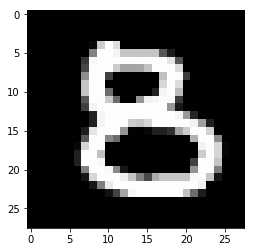

In [0]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r') 
#matrix.squeeze(axis=None)[source]¶ Return a possibly reshaped matrix.

Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, 

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0],-1) #64 imagenes y todo lo demas se reparte
print(inputs.size())
w1= torch.randn(784, 256)
b1= torch.rand(1,256)
w2= torch.randn(256,10)
b2= torch.rand(1,10)
h=activation(torch.mm(inputs,w1)+b1)
out=torch.mm(h,w2)+b2
print(out.size())

torch.Size([64, 784])
torch.Size([64, 10])


In [0]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1) #dim=1 sumar respecto a las columnas xq cada imagen una fila
             #64x10  / 64x1   =64x10

probabilities =softmax(out)
tt=torch.sum(torch.exp(out),dim=1)
print(tt.size())

print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64])
torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


the same one as above with 784 inputs, 256 hidden units, 10 output units and a softmax output.

In [0]:
from torch import nn

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.hidden= nn.Linear(784,256)
    self.output =nn.Linear(256,10)
    
    self.sigmoid =nn.Sigmoid()
    self.softmax =nn.Softmax(dim=1)
    
  def forward(self,x):
    x= self.hidden(x)
    x= self.sigmoid(x)
    x= self.output(x)
    x= self.softmax(x)
    return x

In [0]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256,10)
    
  def forward(self, x):
    x= F.sigmoid(self.hidden(x))
    x= F.softmax(self.output(x), dim=1)
    
    return x

Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden= nn.Linear(784,128)
    self.hidden2=nn.Linear(128,64)
    self.output=nn.Linear(64,10)
    
  def forward(self, x):
    x=F.relu(self.hidden(x))
    x=F.relu(self.hidden2(x))
    x=F.softmax(self.output(x), dim=1)
    return x
  
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
print(model.hidden.weight)
print(model.hidden.bias)

Parameter containing:
tensor([[ 0.0003, -0.0135,  0.0167,  ...,  0.0042, -0.0120,  0.0045],
        [ 0.0349,  0.0082,  0.0340,  ...,  0.0205,  0.0356,  0.0035],
        [-0.0122, -0.0120, -0.0118,  ...,  0.0240,  0.0213, -0.0248],
        ...,
        [-0.0138,  0.0266, -0.0061,  ..., -0.0074,  0.0173, -0.0161],
        [-0.0241, -0.0189,  0.0285,  ..., -0.0085, -0.0198, -0.0018],
        [-0.0306, -0.0185, -0.0267,  ...,  0.0046,  0.0140, -0.0054]],
       requires_grad=True)
Parameter containing:
tensor([-0.0032, -0.0089,  0.0281,  0.0238,  0.0174, -0.0123, -0.0090, -0.0194,
        -0.0074,  0.0023,  0.0167,  0.0271,  0.0063, -0.0016,  0.0206, -0.0016,
         0.0036, -0.0076,  0.0105, -0.0310, -0.0025, -0.0094,  0.0347, -0.0294,
        -0.0061,  0.0052,  0.0052,  0.0115,  0.0229, -0.0134, -0.0010,  0.0006,
        -0.0315,  0.0100, -0.0288,  0.0176,  0.0343,  0.0254, -0.0033,  0.0076,
        -0.0077, -0.0086,  0.0209, -0.0210,  0.0286,  0.0117, -0.0188,  0.0013,
        -0.0105

In [0]:
# Set biases to all zeros
model.hidden.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
# sample from random normal with standard dev = 0.01
model.hidden.weight.data.normal_(std=0.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

#Forward pass

In [0]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py


--2019-05-18 17:59:31--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.1’

helper.py.1         100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-05-18 17:59:31 (50.7 MB/s) - ‘helper.py.1’ saved [2813/2813]



In [0]:
import helper
from helper import view_classify
help(helper)

Help on module helper:

NAME
    helper

FUNCTIONS
    imshow(image, ax=None, title=None, normalize=True)
        Imshow for Tensor.
    
    test_network(net, trainloader)
    
    view_classify(img, ps, version='MNIST')
        Function for viewing an image and it's predicted classes.
    
    view_recon(img, recon)
        Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor

FILE
    /content/helper.py




In [0]:
#!cat helper.py

**texto en negrita**

images_size torch.Size([64, 1, 784])
ps2 torch.Size([1, 10])


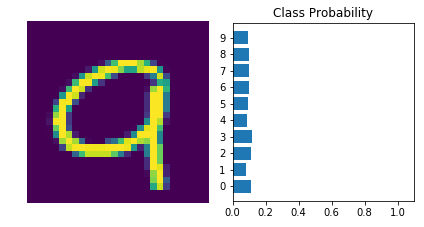

In [0]:
dataiter=iter(trainloader)
images,labels= dataiter.next()
# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64,1,784)
print('images_size',images.size())

img_idx=0
ps= model.forward(images[img_idx,:]) 
#ps2=images[img_idx:img_idx+2,:,:]
print('ps2', ps.size())

img =images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

In [0]:
a = [[4,5,2,3,4], [3,2,1,3,4]]
a[0:2]

### Using `nn.Sequential`


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)
size images_input: torch.Size([64, 1, 28, 28])
resize images_input: torch.Size([64, 1, 784])
ps images_input: torch.Size([1, 10])
imagen_size torch.Size([1, 784])


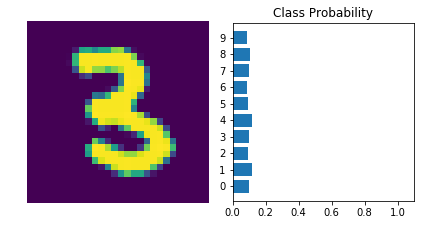

In [0]:
input_size =784
hidden_sizes= [128, 64]
output_size =10

model =nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], output_size),
                     nn.Softmax(dim=1))
                              
print(model)

images, labels = next(iter(trainloader))
print('size images_input:',images.size())
images.resize_(images.shape[0],1,784)
print('resize images_input:',images.size())
ps = model.forward(images[0, :])
print('ps images_input:',ps.size())
print('imagen_size',images[0].size())
helper.view_classify(images[0].view(1,28,28),ps)

In [0]:
print('complete model', model)
print('model ', model[0])
#model[0].weight

complete model Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)
model  Linear(in_features=784, out_features=128, bias=True)


You can also pass in an OrderedDict to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so each operation must have a different name.

In [0]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

print(model[0])
print(model.fc1)

# Training Neural Networks


In [0]:
# Training Neural Networks
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                               ])
trainset =datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader= torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)

In [0]:
# Build a feed-forward network
model= nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels= next(iter(trainloader))

# Flatten images
print(images.size())

images = images.view(images.shape[0], -1)
print(images.size())
#images= images.view(-1,784) igual que lo anterior
#print(images.size())

# Forward pass, get our logits
logits= model(images) #antes de aplicar softmax logits
loss= criterion(logits,labels)
# Calculate the loss with the logits and the labels
print(loss)

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
tensor(2.3299, grad_fn=<NllLossBackward>)


nce it's more convenient to build the model with a log-softmax output using nn.LogSoftmax or F.log_softmax (documentation). Then you can get the actual probabilites by taking the exponential torch.exp(output). With a log-softmax output, you want to use the negative log likelihood loss, nn.NLLLoss (documentation).

Exercise: Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss.

In [0]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
print('shape:',images.shape)
print('size:',images.size())

images = images.view(images.shape[0],-1)
logs= model(images)
loss= criterion(logs, labels)
print(loss)

shape: torch.Size([64, 1, 28, 28])
size: torch.Size([64, 1, 28, 28])
tensor(2.3163, grad_fn=<NllLossBackward>)


In [0]:
x = torch.randn(2,2, requires_grad=True)
print(x)
y = x**2
print(y.grad_fn)

z = y.mean()
#print(z)
z.backward()
print(x.grad) --
print(x/2)--
print(z)

tensor([[ 1.3646, -0.5985],
        [ 0.8079,  0.5792]], requires_grad=True)
tensor(0.8021, grad_fn=<MeanBackward0>)
tensor([[ 0.6823, -0.2992],
        [ 0.4040,  0.2896]])
tensor([[ 0.6823, -0.2992],
        [ 0.4040,  0.2896]], grad_fn=<DivBackward0>)
tensor(0.8021, grad_fn=<MeanBackward0>)


## Loss and Autograd together


In [0]:
model= nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))

criterion= nn.NLLLoss()

images, labels= next(iter(trainloader))
images= images.view(images.shape[0],-1)
print(images.shape)
logps= model(images)
loss= criterion (logps, labels)


torch.Size([64, 784])


In [0]:
print('before backward pass:\n', model[0].weight.grad)
loss.backward()
print('after backward pass:\n', model[0].weight.grad)


before backward pass:
 None
after backward pass:
 tensor([[-0.0046, -0.0046, -0.0046,  ..., -0.0046, -0.0046, -0.0046],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [ 0.0013,  0.0013,  0.0013,  ...,  0.0013,  0.0013,  0.0013],
        ...,
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0076,  0.0076,  0.0076,  ...,  0.0076,  0.0076,  0.0076],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009]])


## Training the network!


In [0]:
from torch import optim
optimizer =optim.SGD(model.parameters(), lr= 0.01)

NameError: ignored

In [0]:
print('initial weight-', model[0].weight)
images, labels = next(iter(trainloader))
images=images.view(images.shape[0],-1)

optimizer.zero_grad()
output= model(images)
loss= criterion (output,labels)
loss.backward()
print('Gradient-', model[0].weight.grad)

initial weight- Parameter containing:
tensor([[-0.0064, -0.0145,  0.0069,  ...,  0.0217,  0.0119, -0.0281],
        [-0.0255, -0.0087,  0.0318,  ...,  0.0034,  0.0145,  0.0222],
        [-0.0063,  0.0114,  0.0032,  ..., -0.0031,  0.0226, -0.0111],
        ...,
        [-0.0060,  0.0327, -0.0183,  ...,  0.0325,  0.0116,  0.0086],
        [ 0.0018, -0.0338,  0.0140,  ..., -0.0216, -0.0076, -0.0341],
        [-0.0108,  0.0166,  0.0321,  ...,  0.0080, -0.0132, -0.0160]],
       requires_grad=True)
Gradient- tensor([[ 3.9171e-03,  3.9171e-03,  3.9171e-03,  ...,  3.9171e-03,
          3.9171e-03,  3.9171e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.8276e-04, -1.8276e-04, -1.8276e-04,  ..., -1.8276e-04,
         -1.8276e-04, -1.8276e-04],
        ...,
        [-4.9628e-06, -4.9628e-06, -4.9628e-06,  ..., -4.9628e-06,
         -4.9628e-06, -4.9628e-06],
        [ 1.4449e-03,  1.4449e-03,  1.4449e-03,  ...,  1.4449e-03,

In [0]:
optimizer.step()
print('updated weight', model[0].weight)

updated weight Parameter containing:
tensor([[-0.0064, -0.0145,  0.0068,  ...,  0.0217,  0.0119, -0.0282],
        [-0.0255, -0.0087,  0.0318,  ...,  0.0034,  0.0145,  0.0222],
        [-0.0063,  0.0114,  0.0032,  ..., -0.0031,  0.0226, -0.0111],
        ...,
        [-0.0060,  0.0327, -0.0183,  ...,  0.0325,  0.0116,  0.0086],
        [ 0.0018, -0.0338,  0.0140,  ..., -0.0216, -0.0077, -0.0341],
        [-0.0108,  0.0166,  0.0321,  ...,  0.0080, -0.0132, -0.0160]],
       requires_grad=True)


In [0]:
a=0.035691 + 0.01*0.01*0.2609 # w0- r*grad/wo
a

0.03571709

In [0]:
-0.0064 -(0.01)*(0.0039171)

-0.0064391710000000005

# Training for real


Now we'll put this algorithm into a loop so we can go through all the images. Some nomenclature, one pass through the entire dataset is called an epoch. So here we're going to loop through trainloader to get our training batches. For each batch, we'll doing a training pass where we calculate the loss, do a backwards pass, and update the weights.

*Exercise: * Implement the training pass for our network. If you implemented it correctly, you should see the training loss drop with each epoch

In [0]:
# Training Neural Networks
import torch
from torch import nn
import torch.nn.functional as F
import torchvision

from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
                               ])
trainset =datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
print(len(trainset)) #60000/64 =938 de trainloader
trainloader= torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 26362831.42it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 459863.53it/s]
  1%|          | 16384/1648877 [00:00<00:11, 143826.58it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 7154353.38it/s]                            
8192it [00:00, 181289.18it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
60000


In [0]:
model= nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss()
optimizer= optim.SGD(model.parameters(), lr=0.003)

epochs=5

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader: # next(iter(trailoader)) aca va recorriendo el trainloader
      images=images.view(images.shape[0],-1) #  Flatten MNIST images into a 784 long vector
     
      # TODO: Training pass
      optimizer.zero_grad()
      logps=model(images)
      loss= criterion(logps, labels)
      loss.backward() #hallo las gradientes
      optimizer.step()        #optimizo los pesos
      running_loss+=loss.item() #Use torch.Tensor.item() to get a Python number from a tensor containing a single value:


  else:
    print(f"Trainfin loss:{running_loss/len(trainloader)}")

Trainfin loss:2.0055752142405967
Trainfin loss:0.960447413072403
Trainfin loss:0.558409836913731
Trainfin loss:0.44602712710846715
Trainfin loss:0.39325697650151975


In [0]:
print(images.type())
print(loss.type())


torch.FloatTensor
torch.FloatTensor


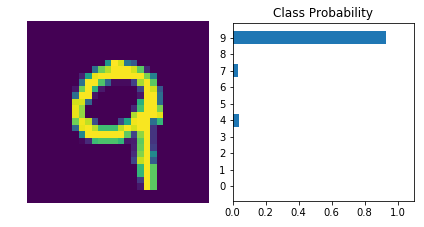

In [0]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))
img=images[0].view(1,784)

with torch.no_grad():
  logps = model(img) #esto entrega el log entonces luego uso exp
  
# Output of the network are log-probabilities, need to take exponential for probabilities
ps= torch.exp(logps)
helper.view_classify(img.view(1,28,28),ps)

## Fashion MNIST train network


In [0]:
import torch
from torchvision import datasets, transform
import numpy as np
import matplotlib.pyplot as plt
%matplolib inline
#import helper
from torch import nn, optim
import torch.nn.functional as F

ImportError: ignored

In [0]:
#import helper
transfor = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,))
    ])
trainset= datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True,transform=transform)
trainloader= torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

testset= datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=False, transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=64)

NameError: ignored

In [0]:
images, labels =next(iter(trainloader))

print(images.shape)
print(labels.shape)


torch.Size([64, 1, 28, 28])
torch.Size([64])


In [0]:
model= nn.Sequential( nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

epochs= 5
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(), lr=0.003)
    
  
for e in range(epochs):
  accumulate_loss=0
  for images, labels in trainloader:
    optimizer.zero_grad()

    images=images.view(images.shape[0],-1)
    logps=model(images)
    loss=criterion(logps, labels)  #log de la probabilidad pero el otro solo prob

    loss.backward()
    optimizer.step()
    accumulate_loss+=loss.item()

  else:
    #print(f"Training loss: {running_loss/len(trainloader)}")
    print('loss is', accumulate_loss/len(trainloader))

      


loss is 0.5101755136556463
loss is 0.3908213513619356
loss is 0.3568397504625036
loss is 0.33375086223106903
loss is 0.31859556367116443


In [0]:
print(labels.size())
print(labels)  ##?? xq solo una etiqueta x cada imagen

torch.Size([64])
tensor([8, 0, 6, 3, 8, 2, 6, 6, 9, 6, 0, 7, 2, 1, 9, 7, 4, 4, 9, 3, 7, 4, 6, 6,
        5, 9, 6, 0, 1, 1, 4, 3, 2, 1, 2, 8, 4, 5, 0, 5, 8, 0, 3, 5, 0, 8, 0, 6,
        4, 3, 5, 6, 1, 3, 7, 6, 3, 9, 3, 5, 3, 7, 8, 1])


torch.Size([1, 784])


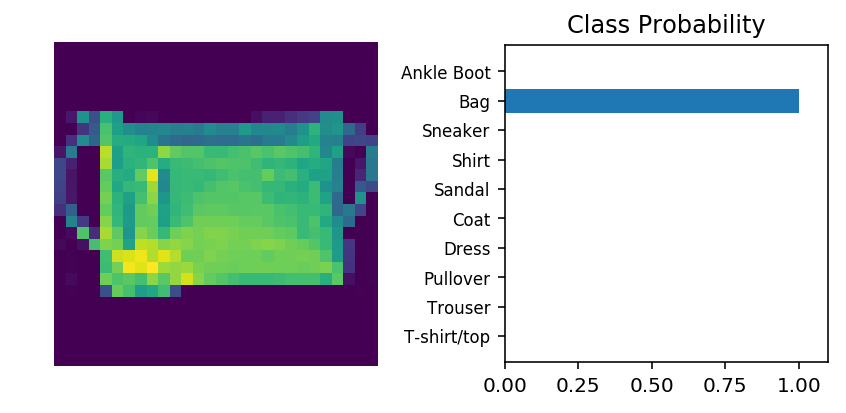

In [0]:
%config InlineBackend.figure_format = 'retina'

images,labels = next(iter(trainloader))
img=images[0].view(1,784)
print(img.size())

ps=torch.exp(model(img))
helper.view_classify(img,ps,version='Fashion')


##Inference and Validation (Solution).ipynb

In [0]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
#import helper
from torchvision import datasets, transforms


In [0]:

transform= transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.5,),(0.5,)) ])

trainset= datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform= transform)
trainloader= torch.utils.data .DataLoader(trainset, batch_size=64, shuffle=True)

testset= datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform= transform)
testloader= torch.utils.data.DataLoader(testset, batch_size=64)


In [0]:
model= nn.Sequential(nn.Linear(784, 256),
                     nn.ReLU(),
                     nn.Linear(256, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1)
)

In [0]:

images, labels = next(iter(testloader))
print(images.size())
images=images.view(images.shape[0],-1)
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64, 10])


In [0]:
top, top_class = ps.topk(1,dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10, :])

tensor([[4],
        [1],
        [4],
        [4],
        [4],
        [1],
        [4],
        [1],
        [1],
        [1]])


In [0]:
equals= top_class ==labels.view(*top_class.shape)

print(top_class.shape)
print(*top_class.shape)
print(labels.shape)

#print(equals)

torch.Size([16, 1])
16 1
torch.Size([16])


This happens because equals has type torch.ByteTensor but torch.mean isn't implement for tensors with that type. So we'll need to convert equals to a float tensor. Note that when we take torch.mean it returns a scalar tensor, to get the actual value as a float we'll need to do accuracy.item().


In [0]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 12.5%


In [0]:
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(), lr=0.003)

epochs=30

train_losses, test_losses= [],[]
for e in range(epochs):
    loss_accumulated=0

    for images, labels in trainloader:
      
        optimizer.zero_grad()
        images=images.view(images.shape[0],-1)
        logps=model(images)
        loss=criterion(logps,labels)
         
        loss.backward()
        optimizer.step()
        
        loss_accumulated+=loss.item()
    else:
        test_loss=0
        accuracy=0   #acaba el train de todo los batches y pasa al test y de ahi promedia entre todos los batches
       
         # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
             for images, labels in testloader:
                  images=images.view(images.shape[0],-1)
                  logps= model(images)
                  test_loss +=criterion(logps,labels)
                  ps= torch.exp(logps)
                  
                  top_p, top_class = ps.topk(1, dim=1)
                  equals = top_class== labels.view(*top_class.shape)
                  accuracy +=torch.mean(equals.type(torch.FloatTensor))
                  
        train_losses.append(loss_accumulated/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}..".format(e+1,epochs),
              "Training Loss:{:.3f}..".format(loss_accumulated/len(trainloader)),
              "Test Loss: {:.3f}..".format(test_loss/len(testloader)),
              "Test accuracy: {:.3f}".format(accuracy/len(testloader)))
                   


Epoch: 1/30.. Training Loss:0.517.. Test Loss: 0.458.. Test accuracy: 0.835
Epoch: 2/30.. Training Loss:0.391.. Test Loss: 0.399.. Test accuracy: 0.856
Epoch: 3/30.. Training Loss:0.354.. Test Loss: 0.392.. Test accuracy: 0.860
Epoch: 4/30.. Training Loss:0.331.. Test Loss: 0.377.. Test accuracy: 0.870
Epoch: 5/30.. Training Loss:0.315.. Test Loss: 0.367.. Test accuracy: 0.869
Epoch: 6/30.. Training Loss:0.301.. Test Loss: 0.377.. Test accuracy: 0.864
Epoch: 7/30.. Training Loss:0.290.. Test Loss: 0.364.. Test accuracy: 0.877
Epoch: 8/30.. Training Loss:0.281.. Test Loss: 0.349.. Test accuracy: 0.879
Epoch: 9/30.. Training Loss:0.276.. Test Loss: 0.379.. Test accuracy: 0.872
Epoch: 10/30.. Training Loss:0.266.. Test Loss: 0.363.. Test accuracy: 0.880
Epoch: 11/30.. Training Loss:0.259.. Test Loss: 0.358.. Test accuracy: 0.880
Epoch: 12/30.. Training Loss:0.252.. Test Loss: 0.364.. Test accuracy: 0.875
Epoch: 13/30.. Training Loss:0.248.. Test Loss: 0.381.. Test accuracy: 0.877
Epoch: 1

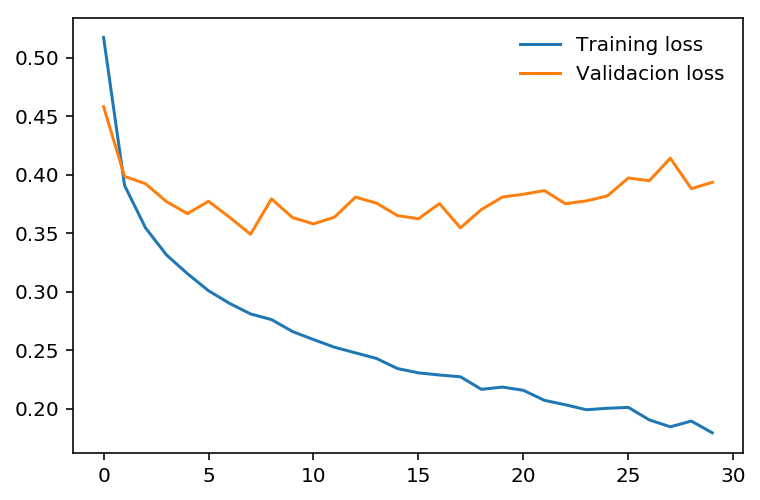

In [0]:

% matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label ='Training loss')
plt.plot(test_losses, label ='Validacion loss')

plt.legend(frameon=False) #frameon : bool, default: rcParams["figure.frameon"]If False, suppress drawing the figure background patch.


## Overfitting , dropout

In [0]:
class Network(nn.Module):
      def __init__(self):
        super().__init__()
    
        self.net=nn.Sequential(nn.Linear(784, 256),
                          nn.ReLU(),
                          nn.Dropout(p=0.2),
                           
                          nn.Linear(256, 128),
                          nn.ReLU(),
                          nn.Dropout(p=0.2),
                         
                          nn.Linear(128, 64),
                          nn.ReLU(),
                          nn.Dropout(p=0.2),

                          nn.Linear(64, 10),
                          nn.LogSoftmax(dim=1))
    #self.dropout =nn.Dropout(p=0.2) # Dropout module with 0.2 drop probability
                           
     
      def forward(self,x):
          x=x.view(x.shape[0],-1)
          x= self.net(x)
          return x


Con las probabilidades, podemos obtener la clase más probable usando el método ps.topk. Esto devuelve los 𝑘 valores más altos. Como solo queremos la clase más probable, podemos usar ps.topk (1). Esto devuelve una tupla de los valores top superiores y los índices 𝑘 superiores. Si el valor más alto es el quinto elemento, obtendremos 4 como el índice.

In [0]:
model=Network()
criterion =nn.NLLLoss()
optimizer= optim.Adam(model.parameters(), lr=0.003)

epochs=30

train_losses, test_losses = [],[]
for e in range(epochs):
    loss_accumulated=0
    
    for images, labels in trainloader:
        optimizer.zero_grad()
      
        logps= model(images)
        loss= criterion(logps,labels)
        loss.backward()
        optimizer.step()
        loss_accumulated+=loss.item()
      
    
    else:
          test_loss=0
          accuracy=0
          
          with torch.no_grad():
            model.eval()  #model.eval(). 
            for images, labels in testloader:
                logps= model(images)
                test_loss +=criterion(logps,labels)
                ps= torch.exp(logps)
                top_p, top_class= ps.topk(1,dim=1) # top_p = probabilidad ... top_clacc= clase
                equal=top_class== labels.view(*top_class.shape) #batch X 1 columna=clase
                accuracy += torch.mean(equal.type(torch.FloatTensor))
            model.train()
            
            train_losses.append(loss_accumulated/len(trainloader))
            test_losses.append(test_loss/len(testloader))
#print(xs[-1]  Negative indices count from the end of the list;
            print("Epoch:{}/{}..".format(e+1,epochs),
                  "Training loss:{:.3f}..".format(loss_accumulated/len(trainloader)), 
                  "Test loss:{:.3f}..".format(test_loss/len(testloader)),
                  "Test accuracy: {:.3f}".format(accuracy/len(testloader)))
 

Epoch:1/30.. Training loss:0.600.. Test loss:0.486.. Test accuracy: 0.825
Epoch:2/30.. Training loss:0.486.. Test loss:0.494.. Test accuracy: 0.831
Epoch:3/30.. Training loss:0.452.. Test loss:0.434.. Test accuracy: 0.847
Epoch:4/30.. Training loss:0.433.. Test loss:0.419.. Test accuracy: 0.852
Epoch:5/30.. Training loss:0.420.. Test loss:0.386.. Test accuracy: 0.863
Epoch:6/30.. Training loss:0.417.. Test loss:0.397.. Test accuracy: 0.862
Epoch:7/30.. Training loss:0.406.. Test loss:0.409.. Test accuracy: 0.856
Epoch:8/30.. Training loss:0.399.. Test loss:0.394.. Test accuracy: 0.864
Epoch:9/30.. Training loss:0.390.. Test loss:0.378.. Test accuracy: 0.863
Epoch:10/30.. Training loss:0.390.. Test loss:0.409.. Test accuracy: 0.850
Epoch:11/30.. Training loss:0.382.. Test loss:0.407.. Test accuracy: 0.859
Epoch:12/30.. Training loss:0.387.. Test loss:0.380.. Test accuracy: 0.864
Epoch:13/30.. Training loss:0.382.. Test loss:0.372.. Test accuracy: 0.866
Epoch:14/30.. Training loss:0.374.

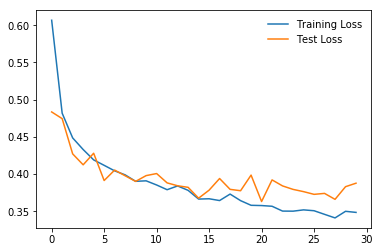

In [0]:
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label ='Test Loss')
plt.legend(frameon=False)

--2019-05-20 19:27:31--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.6’

helper.py.6         100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-05-20 19:27:31 (67.3 MB/s) - ‘helper.py.6’ saved [2813/2813]

torch.Size([1, 28, 28])
tensor([[4.6692e-35, 9.9846e-31, 0.0000e+00, 2.3060e-37, 2.4803e-43, 1.0000e+00,
         0.0000e+00, 3.1150e-11, 4.6019e-19, 5.3280e-11]])


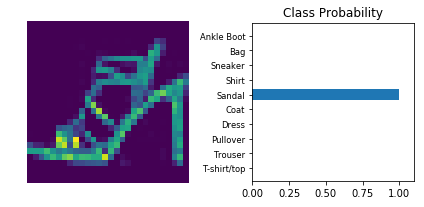

In [0]:
#!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
#correr el de arriba una sola vez
import helper

model.eval()

images, labels= next(iter(testloader))
img=images[0]

print(img.shape)

#logs=model(img)
# loss=criterion
with torch.no_grad():
  output=model(img) # igual model.forward(img)
  ps= torch.exp(output)
  
  helper.view_classify(img.view(1,28,28),ps,version='Fashion')
  print(ps)

## Saving and Loading Models


The parameters for PyTorch networks are stored in a model's state_dict. We can see the state dict contains the weight and bias matrices for each of our layers.

In [0]:
import torch
from torch import nn, optim

class Network(nn.Module):
      def __init__(self):
        super().__init__()
    
        self.net=nn.Sequential(nn.Linear(784, 256),
                          nn.ReLU(),
                          nn.Dropout(p=0.2),
                           
                          nn.Linear(256, 128),
                          nn.ReLU(),
                          nn.Dropout(p=0.2),
                         
                          nn.Linear(128, 64),
                          nn.ReLU(),
                          nn.Dropout(p=0.2),

                          nn.Linear(64, 10),
                          nn.LogSoftmax(dim=1))
    #self.dropout =nn.Dropout(p=0.2) # Dropout module with 0.2 drop probability
                           
     
      def forward(self,x):
          x=x.view(x.shape[0],-1)
          x= self.net(x)
          return x

In [0]:
model=Network()

print("our model:\n\n", model, '\n')
print("the state dict keys:\n\n", model.state_dict().keys())

our model:

 Network(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2)
    (9): Linear(in_features=64, out_features=10, bias=True)
    (10): LogSoftmax()
  )
) 

the state dict keys:

 odict_keys(['net.0.weight', 'net.0.bias', 'net.3.weight', 'net.3.bias', 'net.6.weight', 'net.6.bias', 'net.9.weight', 'net.9.bias'])


In [0]:
print("Our model: \n\n", model.net[0].weight, '\n')


Our model: 

 Parameter containing:
tensor([[-0.0297, -0.0248,  0.0336,  ...,  0.0295, -0.0076,  0.0243],
        [-0.0319,  0.0330,  0.0035,  ..., -0.0193, -0.0069, -0.0187],
        [ 0.0112, -0.0311, -0.0252,  ...,  0.0172, -0.0025,  0.0193],
        ...,
        [-0.0004, -0.0235, -0.0142,  ..., -0.0255, -0.0031, -0.0329],
        [-0.0051,  0.0309, -0.0352,  ..., -0.0125, -0.0019,  0.0323],
        [ 0.0054, -0.0236, -0.0253,  ...,  0.0322, -0.0164, -0.0236]],
       requires_grad=True) 



###SAVE
The simplest thing to do is simply save the state dict with torch.save. For example, we can save it to a file 'checkpoint.pth'.


In [0]:
torch.save(model.state_dict(), 'checkpoint.pth')

###Load
Then we can load the state dict with torch.load.

In [0]:
model=Network()
model.load_state_dict(torch.load('checkpoint.pth'))
#print(state_dict.keys())

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

And to load the state dict in to the network, you do model.load_state_dict(state_dict).

In [0]:
print("Our model: \n\n", model.net[0].weight, '\n')

Our model: 

 Parameter containing:
tensor([[ 0.2394,  0.2225,  0.2282,  ...,  0.1848,  0.1809,  0.2358],
        [ 0.1458,  0.1729,  0.1505,  ...,  0.1163,  0.1294,  0.1177],
        [-0.2585, -0.2585, -0.2671,  ..., -0.4204, -0.2950, -0.1975],
        ...,
        [ 0.2942,  0.2680,  0.3104,  ...,  0.0708,  0.2103,  0.2820],
        [ 0.3288,  0.3463,  0.2933,  ...,  0.2554,  0.2971,  0.3315],
        [ 0.1394,  0.1096,  0.1300,  ...,  0.4401,  0.2702,  0.1366]],
       requires_grad=True) 



#### Revisar mas de save
https://pytorch.org/tutorials/beginner/saving_loading_models.html

## Cats and dogs 

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper


Transforms
When you load in the data with ImageFolder, you'll need to define some transforms. For example, the images are different sizes but we'll need them to all be the same size for training. You can either resize them with transforms.Resize() or crop with transforms.CenterCrop(), transforms.RandomResizedCrop(), etc. We'll also need to convert the images to PyTorch tensors with transforms.ToTensor(). Typically you'll combine these transforms into a pipeline with transforms.Compose(), which accepts a list of transforms and runs them in sequence. It looks something like this to scale, then crop, then convert to a tensor:

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
There are plenty of transforms available, I'll cover more in a bit and you can read through the documentation. https://pytorch.org/docs/master/torchvision/transforms.html


In [0]:

!unzip 'Cat_Dog_data.zip'
#unzip 'Cat_Dog_data.zip' -d Cat_Dog_data2

In [0]:
data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                               transforms.CenterCrop(224),
                               transforms.ToTensor()])

dataset= datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

In [0]:
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)

AttributeError: ignored

In [0]:
print(images.shape)


torch.Size([64, 3, 224, 224])


###DataAugmentation


In [0]:
data_dir_train= 'Cat_Dog_data/train'
data_dir= 'Cat_Dog_data/test'

train_transforms= transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224), #aca es random para q la data obtenga mayor variantes
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor()])

test_transforms= transforms.Compose([transforms.Resize(255), #aca no se hace random 
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor()])

train_data=datasets.ImageFolder(data_dir_train,transform=train_transforms)
test_data=datasets.ImageFolder(data_dir,transform=test_transforms)


trainloader= torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
testloader= torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

In [0]:
images, labels = next(iter(trainloader))
print(images.shape)
images2, labels = next(iter(testloader))
print(images2.shape)

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


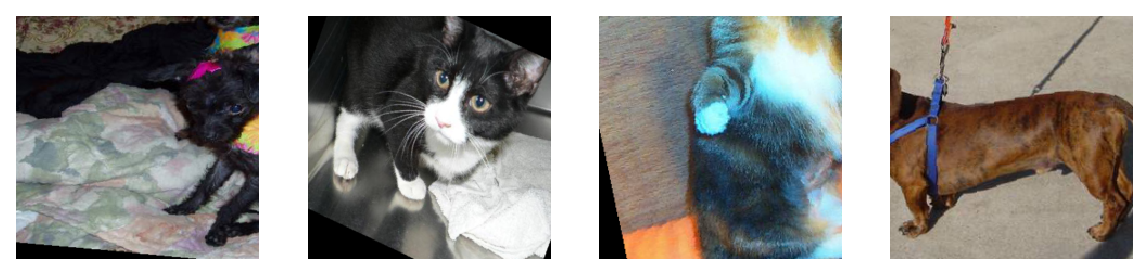

In [0]:
images, labels = next(iter(trainloader))
fig, axes = plt.subplots(figsize=(10,4),ncols=4)
for ii in range(4):
  ax =axes[ii]
  helper.imshow(images[ii], ax=ax, normalize=False)

https://pytorch.org/docs/0.3.0/torchvision/transforms.html

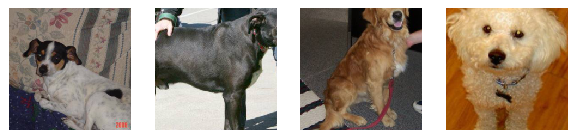

In [0]:
images, labels = next(iter(testloader))
fig, axes = plt.subplots(figsize=(10,4),ncols=4)
for ii in range(4):
  ax =axes[ii]
  helper.imshow(images[ii], ax=ax, normalize=False)

##Transfer Learning

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [0]:
print('imagen capa 0', traintest/len(trainloader))

imagen capa 0 tensor(0.0473)


### se esta probando con data CAt_Dogs

Most of the pretrained models require the input to be 224x224 images. Also, we'll need to match the normalization used when the models were trained. Each color channel was normalized separately, the means are [0.485, 0.456, 0.406] and the standard deviations are [0.229, 0.224, 0.225].

In [0]:
data_dir='Cat_Dog_data'

train_transforms= transforms.Compose([transforms.RandomRotation(30),
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_transforms= transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
train_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader =torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader =torch.utils.data.DataLoader(train_data, batch_size=64)

In [0]:
model= models.densenet121(pretrained=True)
#model

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:00<00:00, 91951091.80it/s]


In [0]:
for param in model.parameters():
    param.requires_grad=False


from collections import OrderedDict

classifier = nn.Sequential( OrderedDict([
                            ('fc1', nn.Linear(1024, 500)),
                            ('relu',nn.ReLU()),
                            ('fc2', nn.Linear(500, 2)),
                            ('output',nn.LogSoftmax(dim=1))
    
]))
model.classifier = classifier

In [0]:
#model

In [0]:
import time

In [0]:
for device in ['cpu', 'cuda']:
  criterion = nn.NLLLoss()
  # Only train the classifier parameters, feature parameters are frozen
  optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
  
  model.to(device)
  #como calculo el time no importa si coloco optimizer_grad
  for ii, (inputs, labels) in enumerate(trainloader):
      inputs, labels = inputs.to(device), labels.to(device)
      start=time.time()
      outputs= model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step() #solo actualiza del classifier
      
      if ii==3:
         break
          
  print(f"Device = {device}; Time per batch:{(time.time()-start)/3:.3f}seconds")
        
   

Device = cpu; Time per batch:6.385seconds
Device = cuda; Time per batch:0.008seconds


In [0]:
#use GPU if it's available

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.densenet121(pretrained = True)

#Freeze parameters so we dont backprop through them
for param in model.parameters():
    param.requieres_grad = False

model.classifier = nn.Sequential(nn.Linear(1024,256),
                                nn.ReLU(),
                                nn.Dropout(0.2),
                                nn.Linear(256,2),
                                nn.LogSoftmax(dim=1))
criterion =nn.NLLLoss()
# Only train the classifier parameters, feature parameters are frozen
optimizer= optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device)

In [0]:
epochs= 1
steps = 0
running_losses=0
print_every=5

for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps +=1 
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        
        running_losses += loss.item()
        
        if steps % print_every == 0:  #1/5 ---5/5
            test_loss = 0
            accuracy=0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps= model.forward(inputs)
                    batch_loss= criterion(logps, labels)
                    
                    test_loss +=batch_loss.item()
                    
                    # Calculate accuracy
                    ps= torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals= top_class == labels.view(*top_class.shape)
                    accuracy+= torch.mean(equals.type(torch.FloatTensor)).item()
                    
            print(f"Epoch: {epoch+1}/{epochs}.."
                  f"Train loss: {running_losses/print_every:.3f}.." #depues de 5 corridas running_loss =5
                  f"Test loss:{test_loss/len(testloader):.3f}.."
                  f"Test accuracy:{accuracy/len(testloader):.3f}"
 
                  )
            running_losses=0
            model.train()

Epoch: 1/1..Train loss: 0.054..Test loss:0.044..Test accuracy:0.983
Epoch: 1/1..Train loss: 0.134..Test loss:0.094..Test accuracy:0.967
Epoch: 1/1..Train loss: 0.075..Test loss:0.037..Test accuracy:0.986
Epoch: 1/1..Train loss: 0.080..Test loss:0.037..Test accuracy:0.988
Epoch: 1/1..Train loss: 0.068..Test loss:0.056..Test accuracy:0.979
Epoch: 1/1..Train loss: 0.032..Test loss:0.036..Test accuracy:0.986
Epoch: 1/1..Train loss: 0.090..Test loss:0.035..Test accuracy:0.988
Epoch: 1/1..Train loss: 0.069..Test loss:0.041..Test accuracy:0.985


### Multi-Layer Perceptron, MNIST


In [0]:
import torch 
from torch import nn, optim
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
transform= transforms.Compose([transforms.ToTensor()])

train_data= datasets.MNIST(root='data', download= True, train=True, transform=transform)
test_data= datasets.MNIST(root='data', download= True, train=False, transform=transform)

trainloader= torch.utils.data.DataLoader(train_data,batch_size=20, shuffle=True)
testloader=torch.utils.data.DataLoader(test_data,batch_size=20)


In [0]:
len(train_data)

60000

#### Visualize a Batch of Training Data


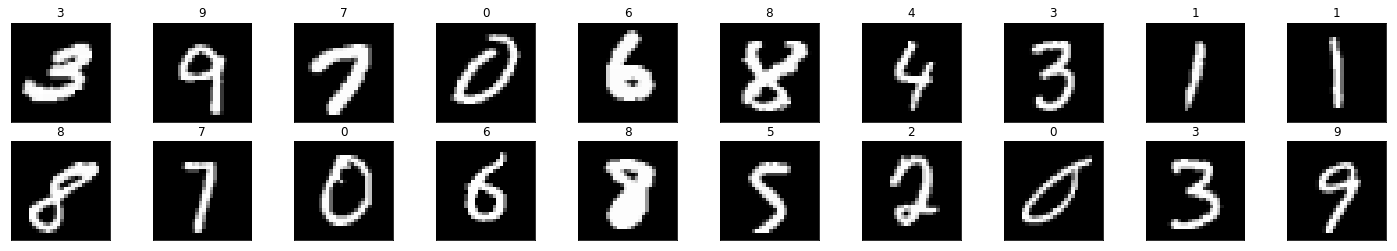

In [0]:
images, labels = next(iter(trainloader))
images=images.numpy()
fig = plt.figure(figsize=(25,4)) #tamaño de cada imagen
for idx in np.arange(20): #np.arange(20) = 0 1 ..19
    ax =fig.add_subplot(2, 20/2,idx+1,xticks=[], yticks=[]) #2 filas 10 col, 1 imag, 
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
  #  plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r') 

    ax.set_title(str(labels[idx].item()))

In [0]:
img.max()/2.5

0.4

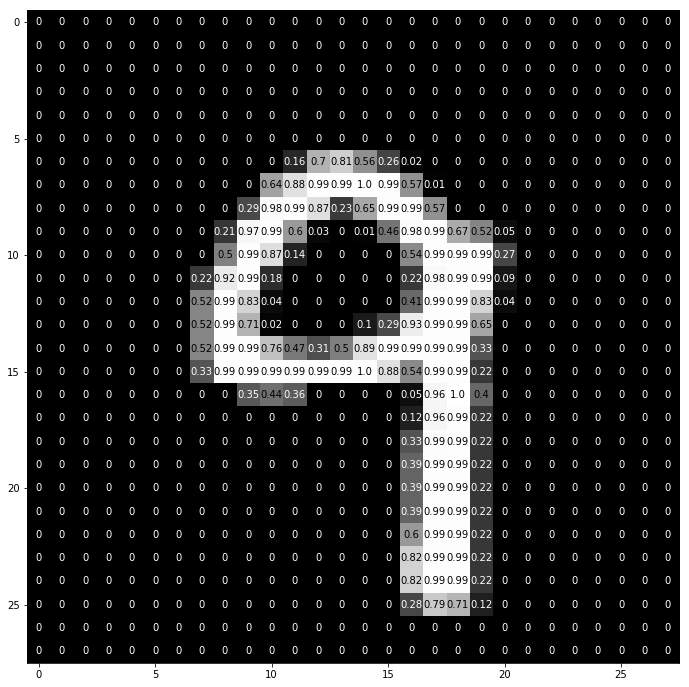

In [0]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111) #add_subplot(nrows, ncols, index, **x,ylist)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [0]:
print(images.s)

(20, 1, 28, 28)


In [0]:
class Network (nn.Module):
    def __ini__(self):
        super().__init__()
        self.net=nn.Sequential(nn.Linear(784,1),
                                nn.ReLU())
          
    def forward(self, x):
        x= x.view(x.shape[0],-1)
        x=self.net(x)
        return x
      
      
model=Network()       

In [0]:
criterion =

## Cifar10_cnn_augmentation

In [0]:
import torch
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

#device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
#Çdevice
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [0]:
 # number of subprocesses to use for data loading
num_workers = 0 #cuando es cpu
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

transform= transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])


train_data= datasets.CIFAR10('data', train= True, download=True, transform= transform)
test_data= datasets.CIFAR10('data', train= False, download=True, transform= transform)#deberia ser otro transform?

Files already downloaded and verified
Files already downloaded and verified


In [0]:
num_train= len(train_data)  #50000
indices= list(range(num_train)) # 0 ....5000
np.random.shuffle(indices) #unorganize
#print(indices[9999])
split = int(np.floor(valid_size* num_train)) #10000 =0.2*5000
train_idx, valid_idx = indices[split:], indices[:split]#1000: end, ini:9999
#print(valid_idx)

train_sampler =SubsetRandomSampler(train_idx)
valid_sampler =SubsetRandomSampler(valid_idx)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers)
#40000
valid_loader=torch.utils.data.DataLoader(train_data, batch_size =batch_size, sampler=valid_sampler, num_workers= num_workers)
#10000

test_loader=torch.utils.data.DataLoader(test_data, batch_size= batch_size,  num_workers= num_workers)

classes= ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
print(len(train_idx))
print(len(valid_idx)) 

40000
10000


In [0]:
#print(len(train_loader))  #2000 x20 =20 000
#print(len(valid_loader))  #500 x20 =10 000
#print(len(train_data)) # 50000 imagenes
print(len(train_loader.dataset))  #2000 x20 =20 000
print(len(valid_loader.dataset)) 
print(len(test_loader)) 
print(len(test_loader.dataset)) 

50000
50000
500
10000


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    img= img/ 2+0.5 # unnormalize
    plt.imshow(np.transpose(img, (1,2,0)))  # convert from Tensor image

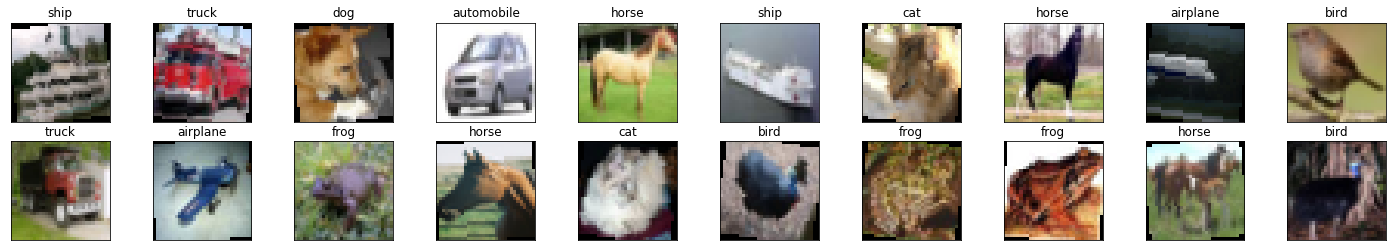

In [0]:
images, labels = next(iter(train_loader))
images= images.numpy()

fig= plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])#add_subplot(nrows, ncols, index, **x,ylist)
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])


In [0]:
print(images[3].shape)
rgb_img= np.squeeze(images[3]) #
print(rgb_img.shape)
for idx in np.arange(rgb_img.shape[0]):
   print (idx)

(3, 32, 32)
(3, 32, 32)
0
1
2


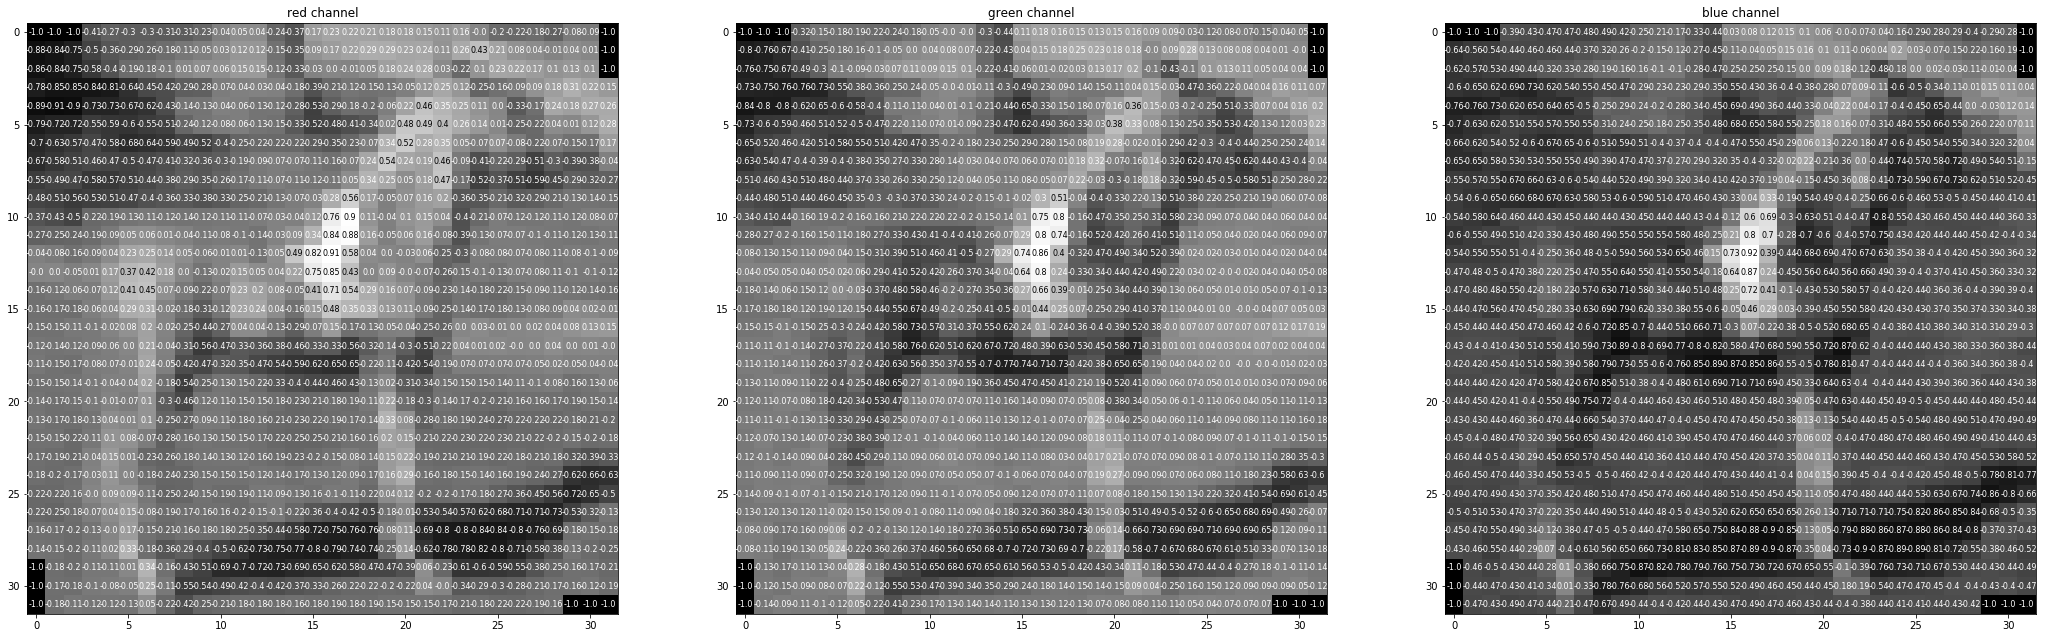

In [0]:
rgb_img= np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig =plt.figure (figsize=(36,36)) #tamaño
for idx in np.arange(rgb_img.shape[0]):
  ax = fig.add_subplot(1,3, idx+1) #add_subplot(nrows, ncols, index, **x,ylist) #capa
  img=rgb_img[idx]
  ax.imshow(img, cmap='gray')
  ax.set_title(channels[idx])
  width, heigth =img.shape
  thresh = img.max()/2.5 
  for x in range(width):
    for y in range(heigth):
      val = round(img[x][y],2) if img[x][y]!=0 else 0
      ax.annotate(str(val), xy=(y,x),
                 horizontalalignment='center',
                 verticalalignment='center', size =8,
                 color= 'white' if img[x][y]<thresh else 'black')
  

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    #image 32x32x3 -3x3x16= (32-3+2)/1 +1 = 32  --16
    #image 16x16x16 -3x3x32= (16-3+2)/1 +1 = 16---4
    #image 4x4x16 -3x3x64= (4-3+2)/1 +1 = 4x4x64-64
    
    #nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
    self.conv1 =nn.Conv2d(3,16,3,padding=1) #convolutional layer (sees 32x32x3 image tensor)
    self.conv2 =nn.Conv2d(16,32,3,padding=1)
    self.conv3=nn.Conv2d(32,64,3, padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.fc1= nn.Linear(64*4*4, 500)
    self.fc2= nn.Linear(500,10)
    self.dropout= nn.Dropout(0.25)
    
    
  def forward(self, x):
    x= self.pool(F.relu(self.conv1(x)))
    x= self.pool(F.relu(self.conv2(x)))
    x= self.pool(F.relu(self.conv3(x)))
    
    x= x.view(-1,64*4*4)
    x= self.dropout(x)
    x= F.relu(self.fc1(x))
    x= self.dropout(x)
    x=self.fc2(x)
    return x
  
model=Net()
print(model)

if train_on_gpu:
  model.cuda()
   

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25)
)


In [0]:
import torch.optim as optim

criterion =nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr= 0.01)

In [0]:
images, labels = next(iter(train_loader))
print(images.shape)

len(train_loader)

torch.Size([20, 3, 32, 32])


2000

In [0]:
n_epochs =30
valid_loss_min = np. Inf # track change in validation loss

for epoch in range(1, n_epochs+1):
  # keep track of training and validation loss

  train_loss=0.0
  valid_loss=0.0
  
  
  ###################
  # train the model #
  ###################
  
  model.train()
  for batch_idx, (data, target) in enumerate (train_loader): #4000total batch20=> batch idx_size=200
      if train_on_gpu:
         data, target = data.cuda(), target.cuda()
        
      optimizer.zero_grad()
      output= model(data)
      # calculate the batch loss..the losses are averaged across observation for each minibatch

      loss=criterion(output, target)
      loss.backward()
      optimizer.step()
      train_loss += loss.item()*data.size(0)# aqui recupero el valor de los antes de haber sido promediado
                                 ####???????
        
  ######################    
  # validate the model #
  ######################
  model.eval()
  for batch_idx, (data, target) in enumerate(valid_loader):#1000total batch20=> batch idx_size=500
      if train_on_gpu:
        data, target =data.cuda(), target.cuda()
   
      output = model(data)
      loss = criterion(output, target)
      valid_loss +=loss.item()*data.size(0)      
                                ####???????
 
      #print(train_loss)
      #print(len(train_loader.dataset))#
  train_loss= train_loss/ len(train_loader.dataset) #deberia ser 40000
  valid_loss= valid_loss/len(valid_loader.dataset)  #deberia ser 10000
  #print(train_loss)

  print('Epoch: {}\t Training Loss:{:.6f} \tValidation Loss: {:.6f}'.format(
    epoch, train_loss, valid_loss))
  
  if valid_loss<= valid_loss_min:
    print('vaidation loss decreased ({:.6f} --> {:.6f}). Saving model ....'.format(
    valid_loss_min,                  #:. juntos
    valid_loss))
    torch.save(model.state_dict(), 'model_augmented.pt') #state dict contains the weight and bias matrices for each of our layers.

    valid_loss_min=valid_loss
  

Epoch: 1	 Training Loss:1.676355 	Validation Loss: 0.356453
vaidation loss decreased (inf --> 0.356453). Saving model ....


In [0]:
print(data.shape)
print(loss.item())
print(output.shape) # de las 20 clases las 10 columnas de clases out 
print(loss) # el valor de los 20 luego sumo todo valid loss= loss_20*20/train
print(valid_loss)
print(len(valid_loader))
#500 batch 20 batch_size = 10 000 images *5?
print(len(valid_loader.dataset))
print(len(train_loader.dataset))

torch.Size([20, 3, 32, 32])
0.6098563075065613
torch.Size([20, 10])
tensor(0.6099, device='cuda:0', grad_fn=<NllLossBackward>)
0.14156350733041764
500
50000
50000


In [0]:
print(criterion(output, target))
#test

tensor(0.6099, device='cuda:0', grad_fn=<NllLossBackward>)


In [0]:
test_loss = 0.0 
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


model.eval()

for data, target in test_loader:
  if train_on_gpu:
    data, target = data.cuda(), target.cuda()
  output= model(data)
  loss= criterion(output, target)
  test_loss+= loss.item()*data.size(0) #cantidad e imagenes por batch
  _, pred = torch.max(output, 1)
  correct_tensor =pred.eq(target.data.view_as(pred))
  correct=np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
  
  for i in range(batch_size):
    label=target.data[i] # de las 20 imagenes elije los tops
    class_correct[label]+= correct[i].item() #de la clase veo 
    class_total[label] +=1
    
test_loss = test_loss/ len(test_loader.dataset)
print('Test Loss:{:.6f}\n'. format(test_loss))

for i in range(10):
    if class_total[i]>0:
      print('Test Accuracy of%5s: %2d%% (%2d/%2d)' %(
       classes[i], 100*class_correct[i]/class_total[i],
       np.sum(class_correct[i]),np.sum(class_total[i])))
    else:
      print('Test accuracy of %5s: N/A (no training examples)' % (classes[i]))
print('\n Test Accuracy(overall): %2d%% (%2d/%2d)'% (
 100.*np.sum(class_correct)/np.sum(class_total),
 np.sum(class_correct), np.sum(class_total)))    

Test Loss:0.702572

Test Accuracy ofairplane: 77% (770/1000)
Test Accuracy ofautomobile: 91% (912/1000)
Test Accuracy of bird: 61% (617/1000)
Test Accuracy of  cat: 61% (618/1000)
Test Accuracy of deer: 76% (762/1000)
Test Accuracy of  dog: 54% (541/1000)
Test Accuracy of frog: 87% (874/1000)
Test Accuracy ofhorse: 80% (800/1000)
Test Accuracy of ship: 86% (861/1000)
Test Accuracy oftruck: 84% (847/1000)

 Test Accuracy(overall): 76% (7602/10000)


In [0]:
  _, pred = torch.max(output, 1)
  pred

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 6, 7, 9, 8, 5, 7, 8, 6],
       device='cuda:0')

In [0]:
target.data

tensor([0, 4, 2, 0, 7, 5, 8, 0, 8, 2, 7, 0, 3, 5, 3, 8, 3, 5, 1, 7],
       device='cuda:0')

In [0]:
target.data[4]
target[4]   #son iguales

tensor(7, device='cuda:0')

In [0]:
correct

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

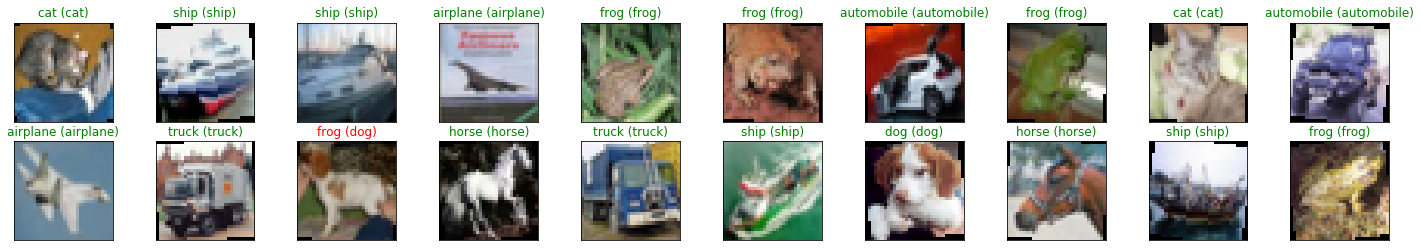

In [0]:
images, labels= next(iter(test_loader))
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
  images= images.cuda()
  
output = model(images)
_, preds_tensor= torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

fig= plt.figure(figsize=(25,4))
for idx in np.arange(20):
  ax= fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
  imshow(images.cpu()[idx])
  ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))
                                         

#Bacth Normalization
normalize the inputs to layers within the network.
During training, we normalize each layer's inputs by using the mean and variance of the values in the current *batch*.

In [0]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [0]:
# number of subprocesses to use for data loading
num_workers = 0 #para hacer en paralelo en CPU
# how many samples per batch to load
batch_size = 64
# convert data to torch.FloatTensor
transform = transforms.ToTensor()
# get the training and test datasets
train_data = datasets.MNIST(root='data', train=True,download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,download=True, transform=transform)
# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers)

0it [00:00, ?it/s]

9920512it [00:01, 9366071.38it/s]                            


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 137267.10it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2247997.37it/s]                            
0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 52119.83it/s]            


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


(64, 1, 28, 28)
(28, 28)


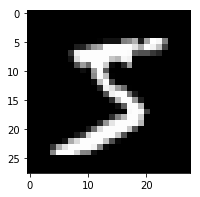

In [0]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
# get one image from the batch
print(images.shape)
img = np.squeeze(images[0]) # redimensiona a Matrix X*Y
print(img.shape)

fig = plt.figure(figsize = (3,3))   #3x3 inches
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

Layers with batch normalization do not include a bias term.
We use PyTorch's BatchNorm1d function to handle the math. This is the function you use to operate on linear layer outputs; you'll use BatchNorm2d for 2D outputs like filtered images from convolutional layers.
We add the batch normalization layer before calling the activation function.

In [0]:
class NeuralNet(nn.Module):
    def __init__(self, use_batch_norm, input_size=784, hidden_dim=256, output_size=10):
        """
        Creates a PyTorch net using the given parameters.        
        :param use_batch_norm: bool
            Pass True to create a network that uses batch normalization; False otherwise
            Note: this network will not use batch normalization on layers that do not have an
            activation function.
        """
        super(NeuralNet, self).__init__() # init super
        
        # Default layer sizes
        self.input_size = input_size # (28*28 images)
        self.hidden_dim = hidden_dim
        self.output_size = output_size # (number of classes)
        # Keep track of whether or not this network uses batch normalization.
        self.use_batch_norm = use_batch_norm
        
        # define hidden linear layers, with optional batch norm on their outputs
        # layers with batch_norm applied have no bias term
        if use_batch_norm:
            self.fc1 = nn.Linear(input_size, hidden_dim*2, bias=False)
            self.batch_norm1 = nn.BatchNorm1d(hidden_dim*2)
        else:
            self.fc1 = nn.Linear(input_size, hidden_dim*2)
            
        # define *second* hidden linear layers, with optional batch norm on their outputs
        if use_batch_norm:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim, bias=False)
            self.batch_norm2 = nn.BatchNorm1d(hidden_dim)
        else:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim)
        
        # third and final, fully-connected layer
        self.fc3 = nn.Linear(hidden_dim, output_size)       
        
    def forward(self, x):
        # flatten image
        x = x.view(-1, 28*28)
        # all hidden layers + optional batch norm + relu activation
        x = self.fc1(x)
        if self.use_batch_norm:
            x = self.batch_norm1(x)
        x = F.relu(x)
        # second layer
        x = self.fc2(x)
        if self.use_batch_norm:
            x = self.batch_norm2(x)
        x = F.relu(x)
        # third layer, no batch norm or activation
        x = self.fc3(x)
        return x

In [0]:
net_batchnorm = NeuralNet(use_batch_norm=True)
net_no_norm = NeuralNet(use_batch_norm=False)

print(net_batchnorm)
print()
print(net_no_norm)

In [0]:
def train(model, n_epochs=10):
    # number of epochs to train the model
    n_epochs = n_epochs
    # track losses
    losses = []
        
    # optimization strategy 
    # specify loss function (categorical cross-entropy)
    criterion = nn.CrossEntropyLoss()

    # specify optimizer (stochastic gradient descent) and learning rate = 0.01
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    # set the model to training mode
    model.train()
    
    for epoch in range(1, n_epochs+1):
        # monitor training loss
        train_loss = 0.0

        ###################
        # train the model #
        ###################
        batch_count = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update average training loss
            train_loss += loss.item() # add up avg batch loss
            batch_count +=1                

        # print training statistics 
        losses.append(train_loss/batch_count)
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch, 
            train_loss/batch_count))
    
    # return all recorded batch losses
    return losses

In [0]:
# batchnorm model losses
losses_batchnorm = train(net_batchnorm)

Epoch: 1 	Training Loss: 0.554080
Epoch: 2 	Training Loss: 0.200316
Epoch: 3 	Training Loss: 0.137685
Epoch: 4 	Training Loss: 0.103665
Epoch: 5 	Training Loss: 0.080944
Epoch: 6 	Training Loss: 0.064349
Epoch: 7 	Training Loss: 0.051576
Epoch: 8 	Training Loss: 0.041460
Epoch: 9 	Training Loss: 0.033405
Epoch: 10 	Training Loss: 0.026998


In [0]:
# *no* norm model losses
losses_no_norm = train(net_no_norm)

Epoch: 1 	Training Loss: 1.589178
Epoch: 2 	Training Loss: 0.510252
Epoch: 3 	Training Loss: 0.376790
Epoch: 4 	Training Loss: 0.329943
Epoch: 5 	Training Loss: 0.301213
Epoch: 6 	Training Loss: 0.279159
Epoch: 7 	Training Loss: 0.260375
Epoch: 8 	Training Loss: 0.243566
Epoch: 9 	Training Loss: 0.228233
Epoch: 10 	Training Loss: 0.214189


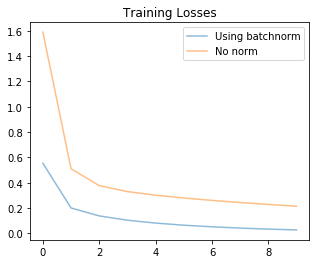

In [0]:
# compare
fig, ax = plt.subplots(figsize=(5,4))
#losses_batchnorm = np.array(losses_batchnorm)
#losses_no_norm = np.array(losses_no_norm)
plt.plot(losses_batchnorm, label='Using batchnorm', alpha=0.5)
plt.plot(losses_no_norm, label='No norm', alpha=0.5)
plt.title("Training Losses")
plt.legend()

In [0]:
def test(model, train):
    # initialize vars to monitor test loss and accuracy
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    test_loss = 0.0

    # set model to train or evaluation mode
    # just to see the difference in behavior
    if(train==True):
        model.train()
    if(train==False):
        model.eval()
    
    # loss criterion
    criterion = nn.CrossEntropyLoss()
    
    for batch_idx, (data, target) in enumerate(test_loader):
        batch_size = data.size(0)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss += loss.item()*batch_size
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(batch_size):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    print('Test Loss: {:.6f}\n'.format(test_loss/len(test_loader.dataset)))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

In [0]:
# test batchnorm case, in *train* mode
test(net_batchnorm, train=True)

Test Loss: 0.087262

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 96% (998/1032)
Test Accuracy of     3: 97% (981/1010)
Test Accuracy of     4: 97% (957/982)
Test Accuracy of     5: 97% (868/892)
Test Accuracy of     6: 97% (930/958)
Test Accuracy of     7: 96% (997/1028)
Test Accuracy of     8: 96% (941/974)
Test Accuracy of     9: 95% (962/1009)

Test Accuracy (Overall): 97% (9730/10000)


In [0]:
# test batchnorm case, in *evaluation* mode
test(net_batchnorm, train=False)

Test Loss: 0.074634

Test Accuracy of     0: 99% (972/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 97% (1006/1032)
Test Accuracy of     3: 97% (987/1010)
Test Accuracy of     4: 97% (958/982)
Test Accuracy of     5: 97% (874/892)
Test Accuracy of     6: 97% (930/958)
Test Accuracy of     7: 96% (993/1028)
Test Accuracy of     8: 96% (939/974)
Test Accuracy of     9: 97% (986/1009)

Test Accuracy (Overall): 97% (9770/10000)


In [0]:
# for posterity, test no norm case in eval mode
test(net_no_norm, train=False)

Test Loss: 0.205608

Test Accuracy of     0: 98% (965/980)
Test Accuracy of     1: 98% (1114/1135)
Test Accuracy of     2: 91% (941/1032)
Test Accuracy of     3: 92% (939/1010)
Test Accuracy of     4: 93% (916/982)
Test Accuracy of     5: 93% (833/892)
Test Accuracy of     6: 95% (913/958)
Test Accuracy of     7: 92% (953/1028)
Test Accuracy of     8: 91% (888/974)
Test Accuracy of     9: 93% (942/1009)

Test Accuracy (Overall): 94% (9404/10000)




> Adam is one the most popular optimizers because it can adapt the learning rate for each parameter individually
loss_func = nn.NLLLoss()
optimizer = optim.Adam(resnet50.parameters())



In [0]:
#para normalizar
class MyDataset(Dataset):
    def __init__(self):
        self.data = torch.randn(100, 3, 24, 24)
        
    def __getitem__(self, index):
        x = self.data[index]
        return x

    def __len__(self):
        return len(self.data)
    

dataset = MyDataset()
loader = DataLoader(
    dataset,
    batch_size=10,
    num_workers=1,
    shuffle=False
)


mean = 0.
std = 0.
nb_samples = 0.
for data in loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

In [0]:
#ver cual es mejor

import torch
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

class MyDataset(Dataset):
    def __init__(self):
        self.data = torch.randn(1000, 3, 24, 24)
        
    def __getitem__(self, index):
        x = self.data[index]
        return x

    def __len__(self):
        return len(self.data)

def online_mean_and_sd(loader):
    """Compute the mean and sd in an online fashion

        Var[x] = E[X^2] - E^2[X]
    """
    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for data in loader:

        b, c, h, w = data.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(data, dim=[0, 2, 3])
        sum_of_square = torch.sum(data ** 2, dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)

        cnt += nb_pixels

    return fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)

    

dataset = MyDataset()
loader = DataLoader(
    dataset,
    batch_size=1,
    num_workers=1,
    shuffle=False
)

mean, std = online_mean_and_sd(loader)